# **Project**    - Wine Quality Prediction



# **Problem Statement**


The focus is on predicting the quality of wine based on its chemical characteristics, offering a
real-world application of machine learning in the context of viticulture. The dataset
encompasses diverse chemical attributes, including density and acidity, which serve as the
features for three distinct classifier models.

## ***1. Understand the  Data***

### Import Libraries

In [7]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [8]:
# Load Dataset
df = pd.read_csv("C:/Users/asus/Downloads/archive (2)/WineQT.csv")

### Dataset First View

In [9]:
# Dataset First Look
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
df.shape
print(f'Dataset is having {df.shape[0]} rows & {df.shape[1]} columns.')

Dataset is having 1143 rows & 13 columns.


### Dataset Information

In [11]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
df.duplicated().any()

np.False_

In [13]:
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

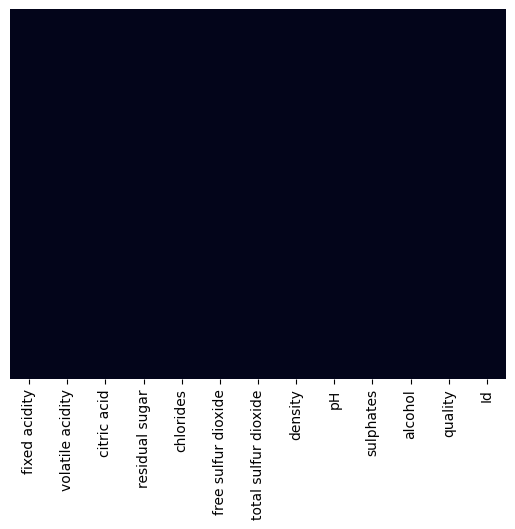

In [15]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False, yticklabels=False);

### What did I know about this dataset?

In this project we aim to predict whether a certain red wine is “good quality” or not. Each wine in this dataset is assigned a “quality” value between 0 and 1. 11 main features which were used to predict the quality is listed below:

 1)Fixed acidity 
 2)Volatile acidity 
 3)Citric acid 
 4)Residual sugar 
 5)Chlorides 
 6)Free sulfur dioxide 
 7)Total sulfur dioxide 
 8)Density 
 9)pH 
 10)Sulfates 
 11)Alcohol 

## ***2. Understanding  Variables***

In [16]:
# Dataset Columns
df.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'Id']

In [17]:
# Dataset Describe
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique(),'\n')


No. of unique values in fixed acidity is 91 

No. of unique values in volatile acidity is 135 

No. of unique values in citric acid is 77 

No. of unique values in residual sugar is 80 

No. of unique values in chlorides is 131 

No. of unique values in free sulfur dioxide is 53 

No. of unique values in total sulfur dioxide is 138 

No. of unique values in density is 388 

No. of unique values in pH is 87 

No. of unique values in sulphates is 89 

No. of unique values in alcohol is 61 

No. of unique values in quality is 6 

No. of unique values in Id is 1143 



## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

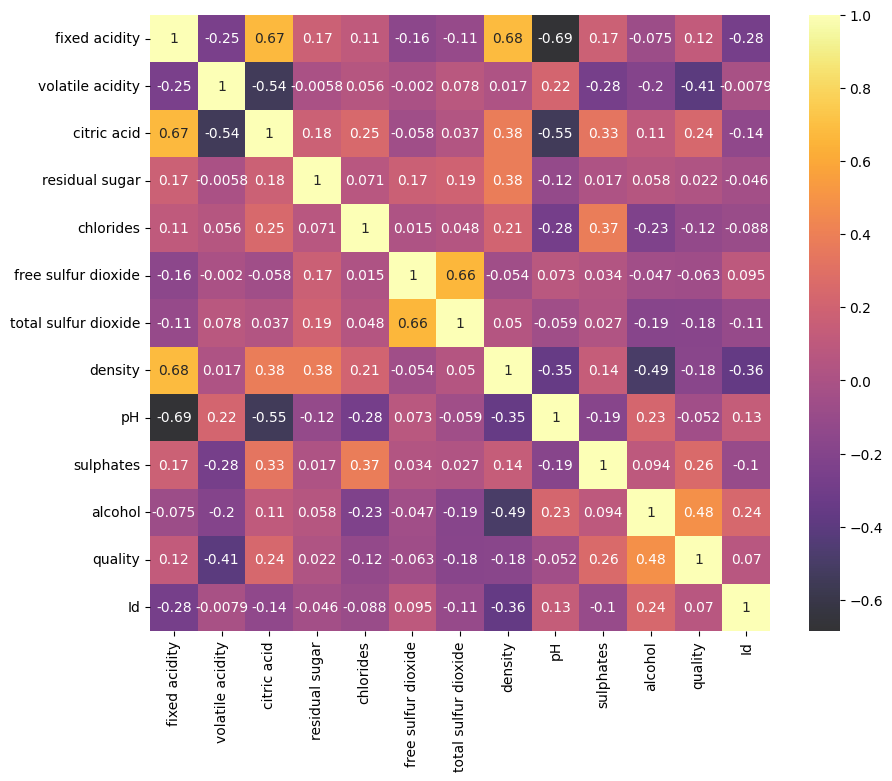

In [20]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='inferno',annot=True,alpha=0.8)
plt.show()

#### Chart - 2

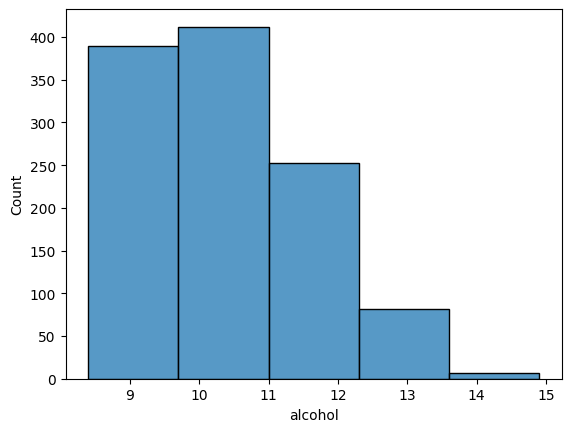

In [21]:
sns.histplot(df.alcohol, bins=5);

#### Chart - 3

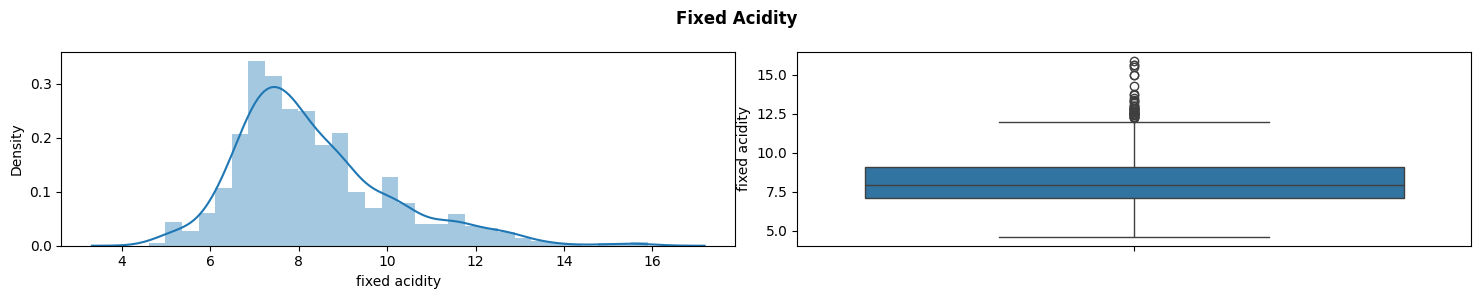

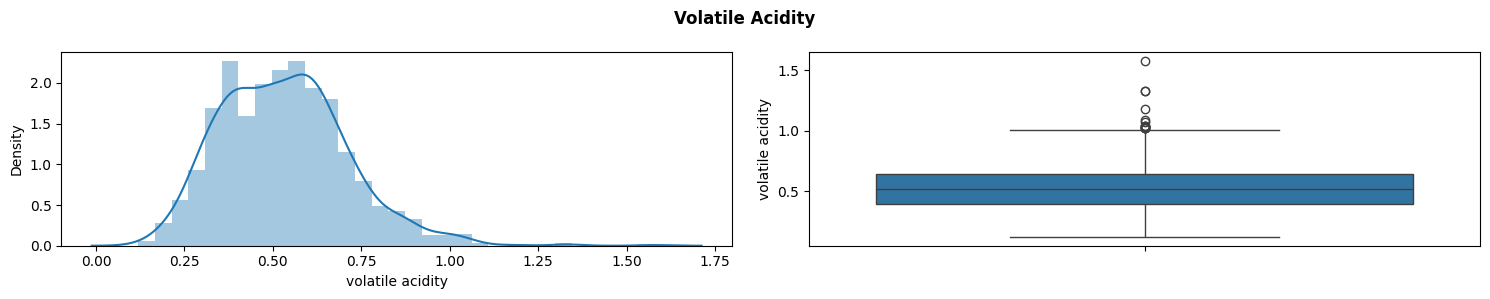

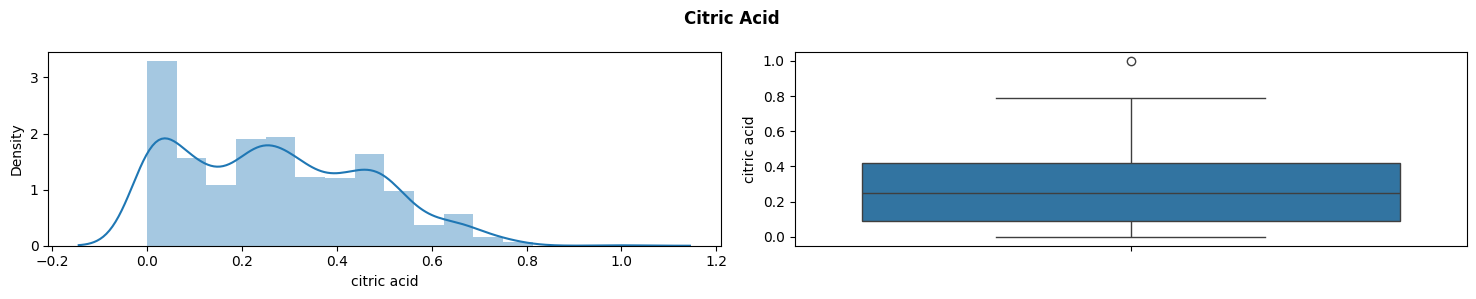

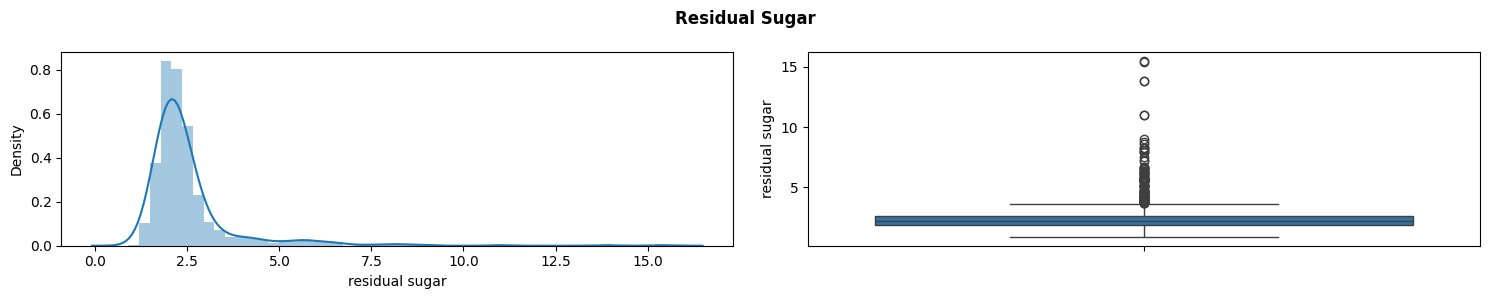

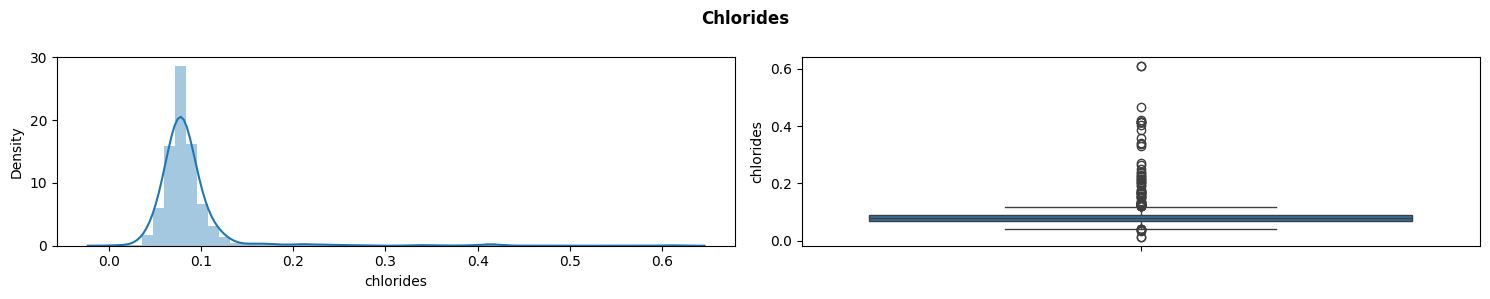

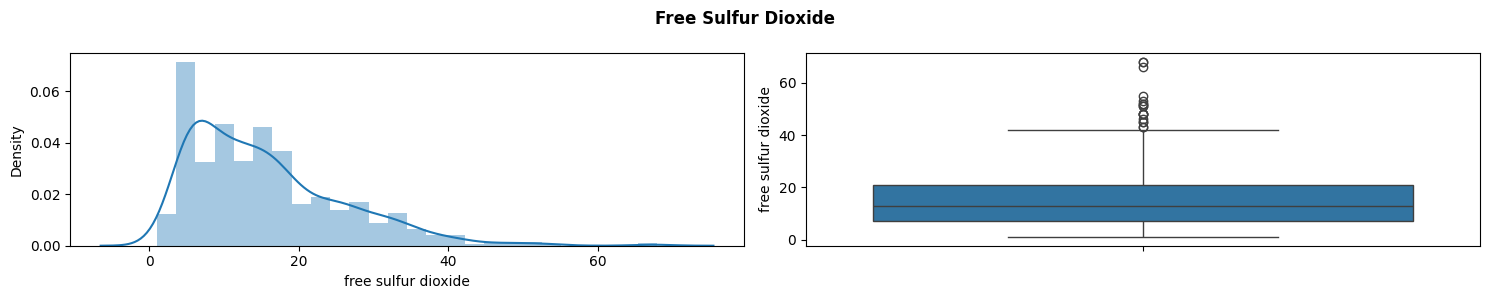

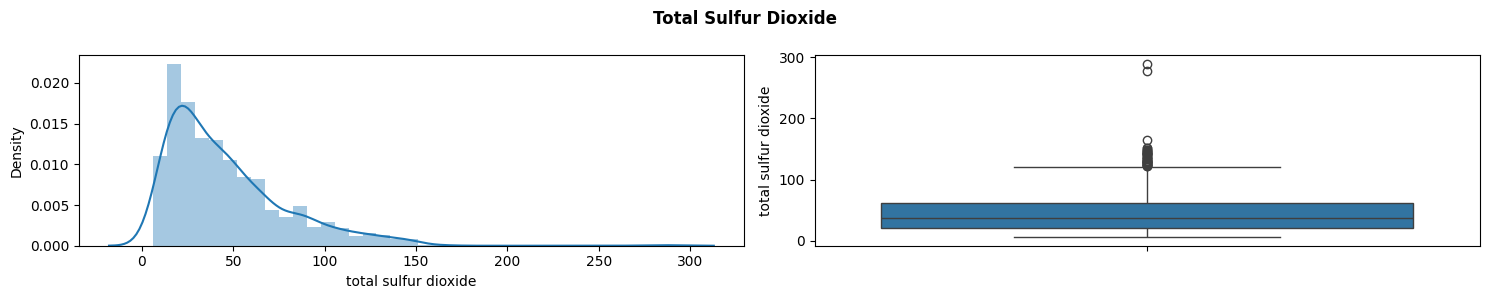

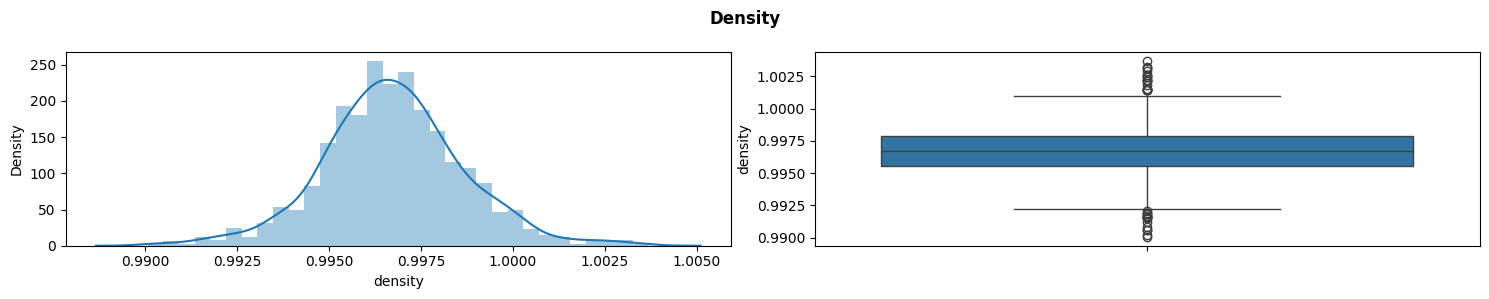

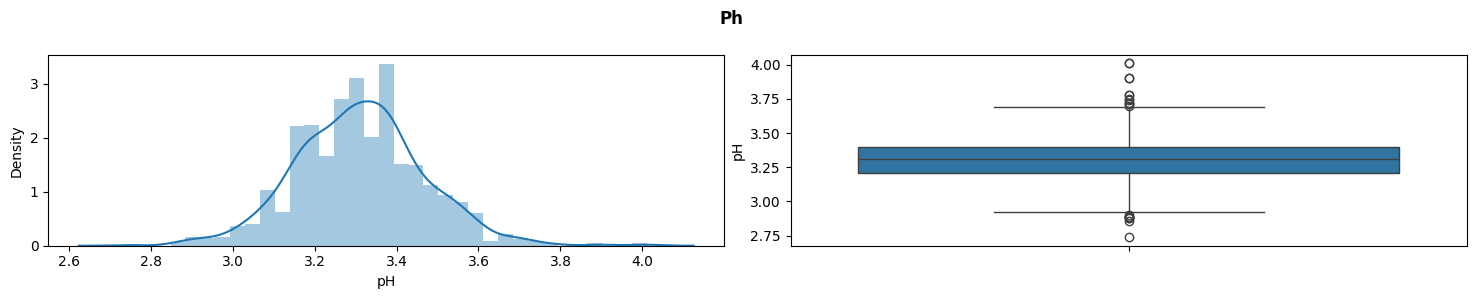

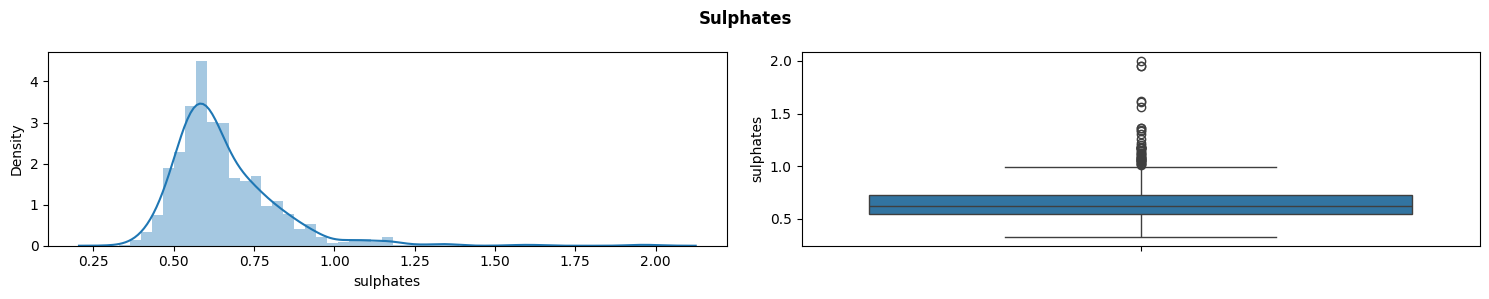

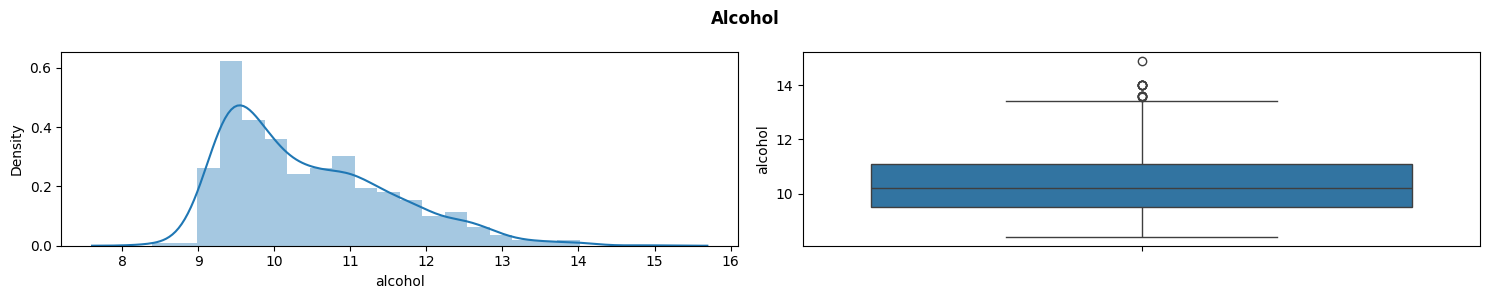

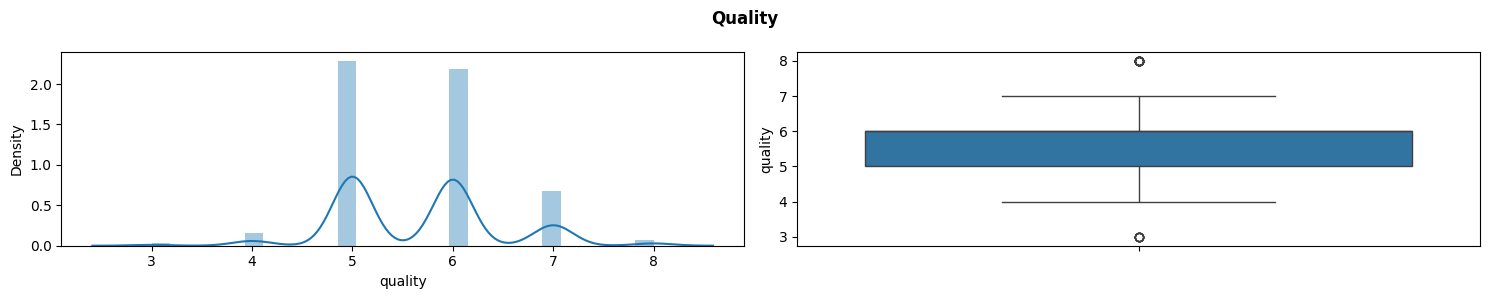

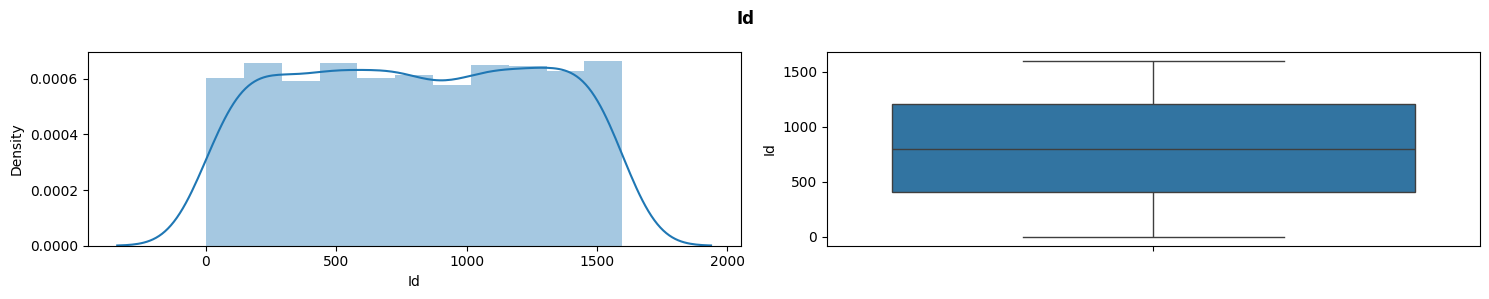

In [22]:
for col in df.columns.to_list():
    fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(15,3))
    sns.distplot(df[col], ax = ax[0])
    sns.boxplot(df[col], ax = ax[1])
    plt.suptitle(f'{col.title()}',weight='bold')
    plt.tight_layout()

#### Chart - 4

In [23]:
# Chart - 5 visualization code

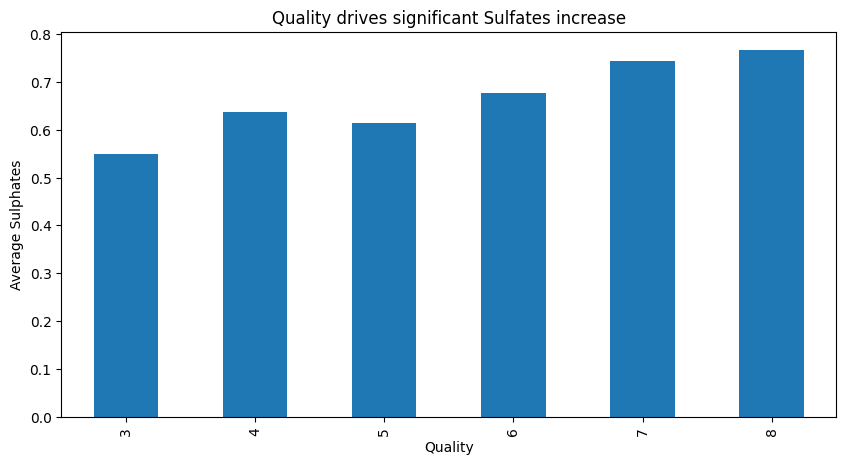

In [24]:
df.groupby(['quality'])['sulphates'].mean().plot(kind='bar', figsize=(10,5))
plt.xlabel('Quality')
plt.ylabel('Average Sulphates')
plt.title('Quality drives significant Sulfates increase')
plt.show()

One reason can be for the higher average sulfates in higher quality wines could be that sulfates might contribute to better preservation and taste of the wine. Hence, wines classified with higher quality scores like 8 may incorporate more sulfates in their production process. However, more detailed analysis would be needed to confirm this insight.

#### Chart - 5 - Pair Plot

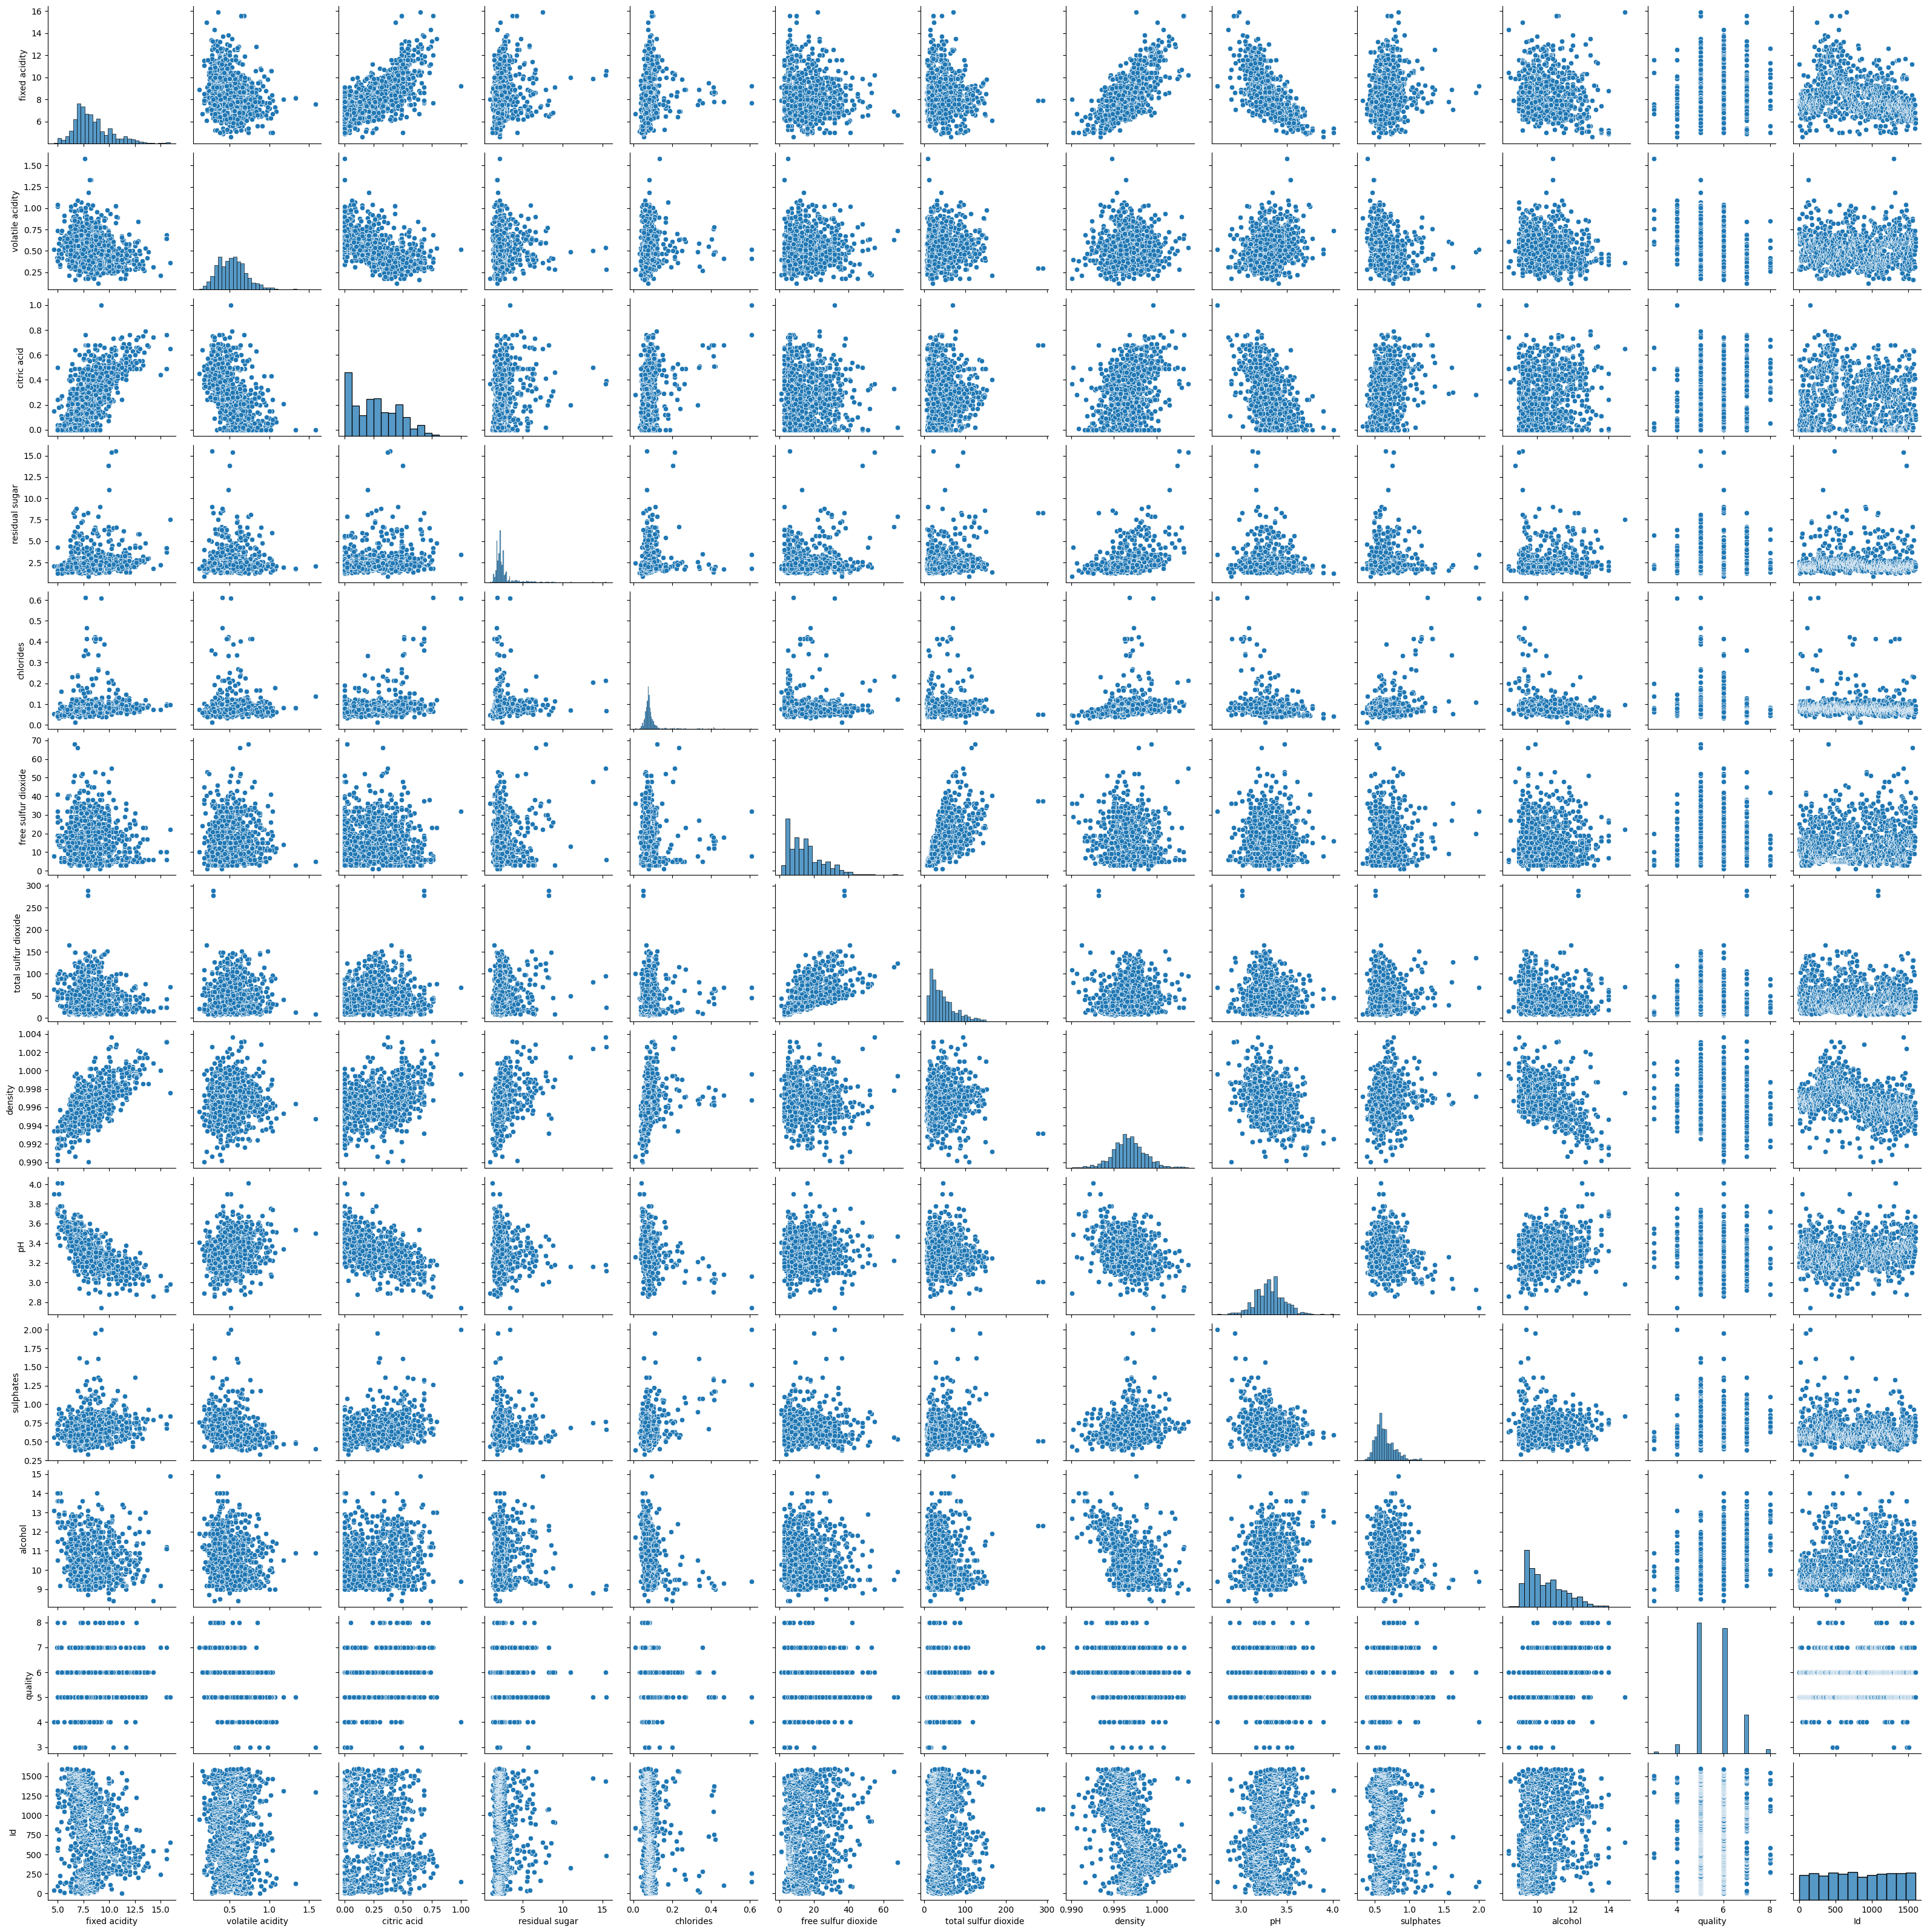

In [25]:
sns.pairplot(df);

After some analysis its clear that:
    
There are no null values present in our dataset.

Column ID can be dropped since its not necessary for our prediction.

Column quality is our target variable.

All the datatypes are either float or int so there is no need for any encoding.

It's a multiclass classification problem since we have [5 6 7 4 8 3] in our target.

## ***Handling Outliers***

In [26]:
num_col = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'Id']

In [27]:
def clip_outliers(df):
    for col in num_col:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1 
        lower_bound = q1 - iqr * 1.5 
        upper_bound = q3 + iqr * 1.5
        
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df


In [28]:
df = clip_outliers(df)

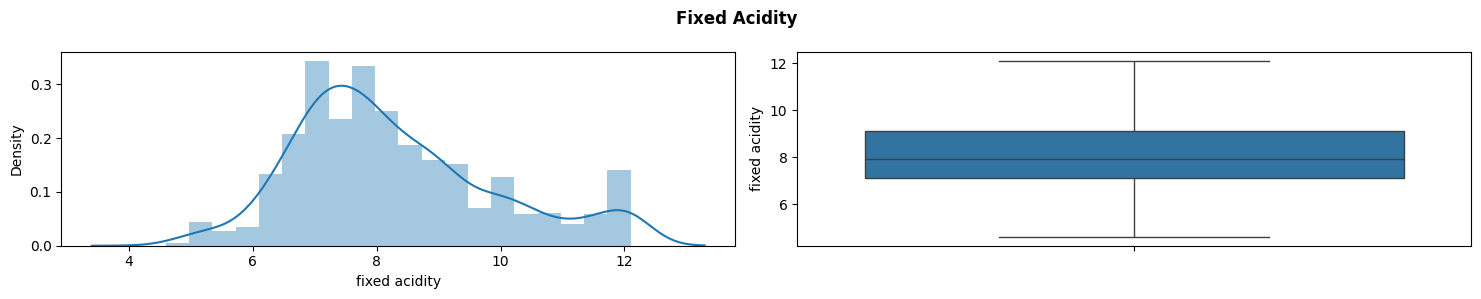

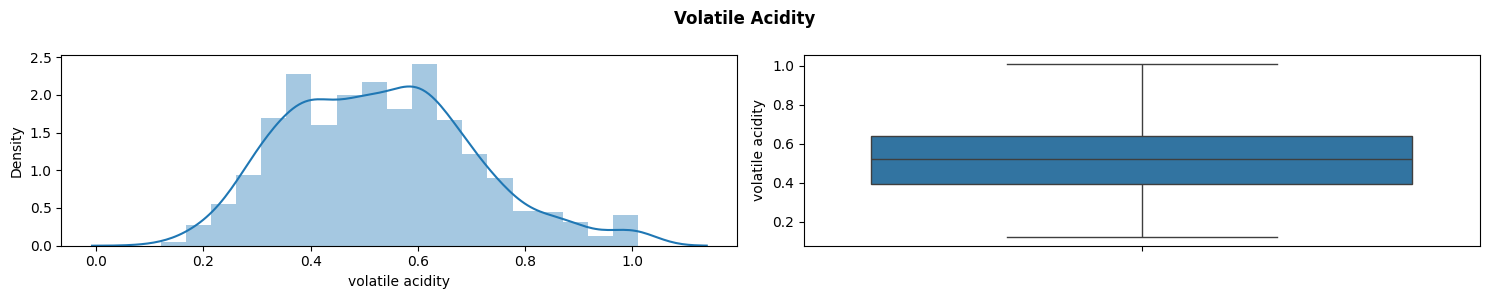

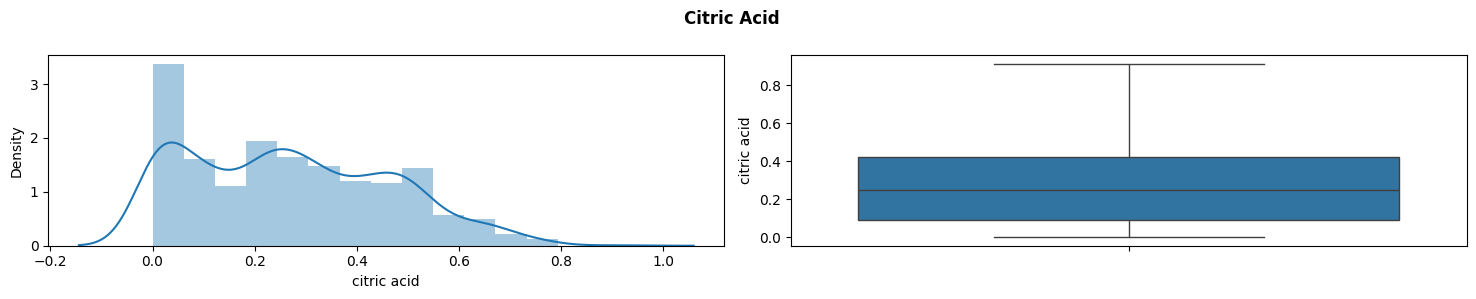

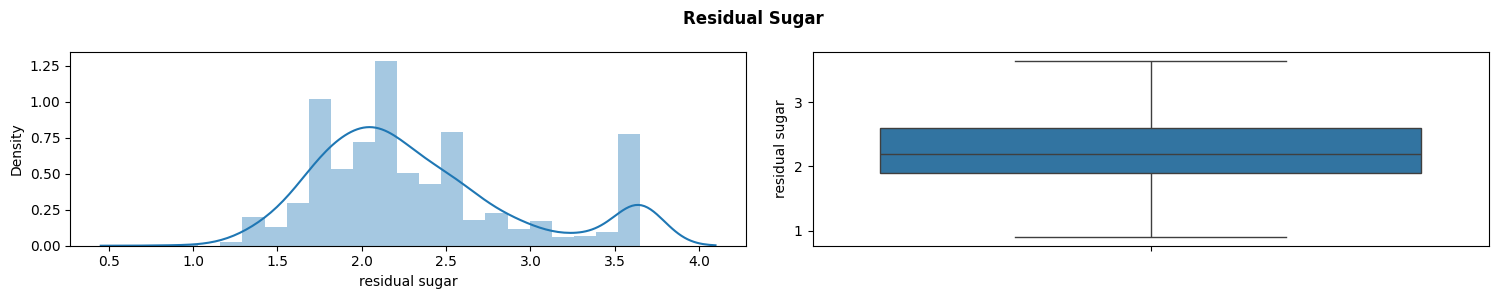

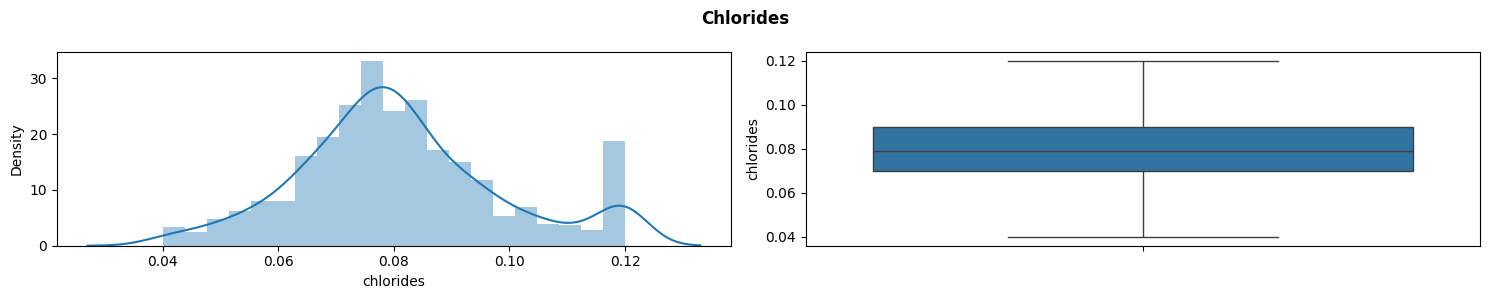

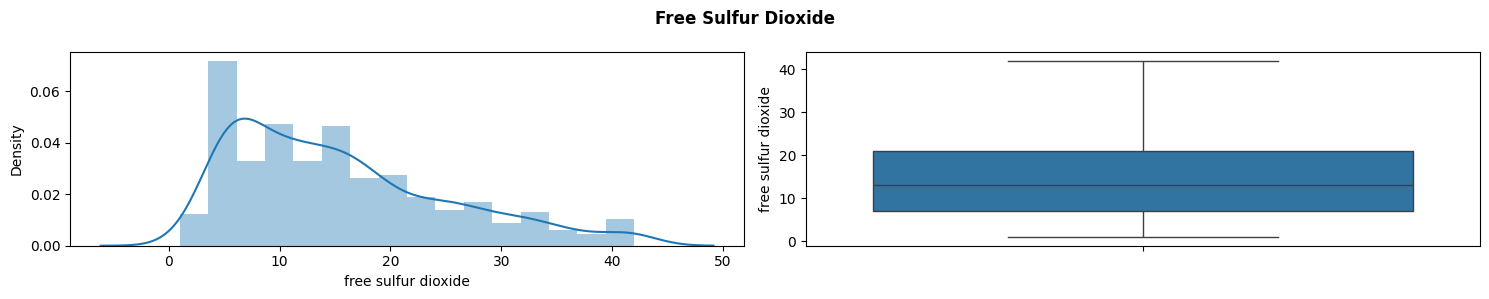

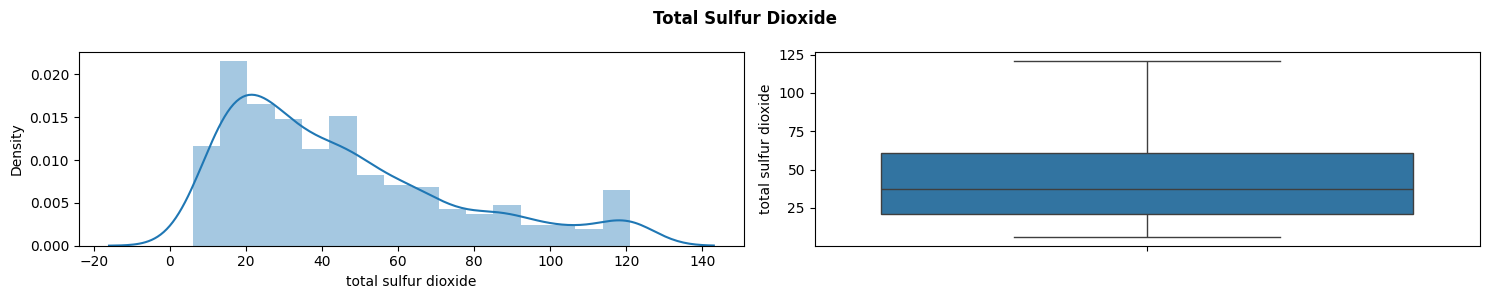

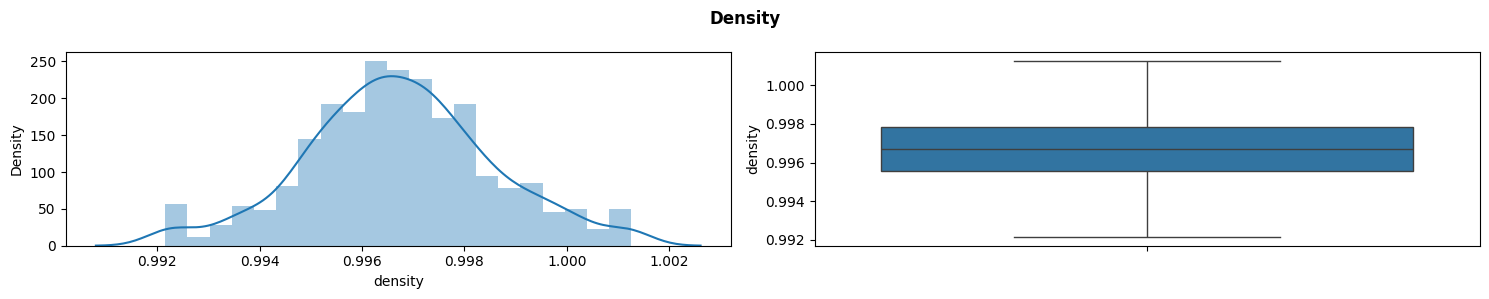

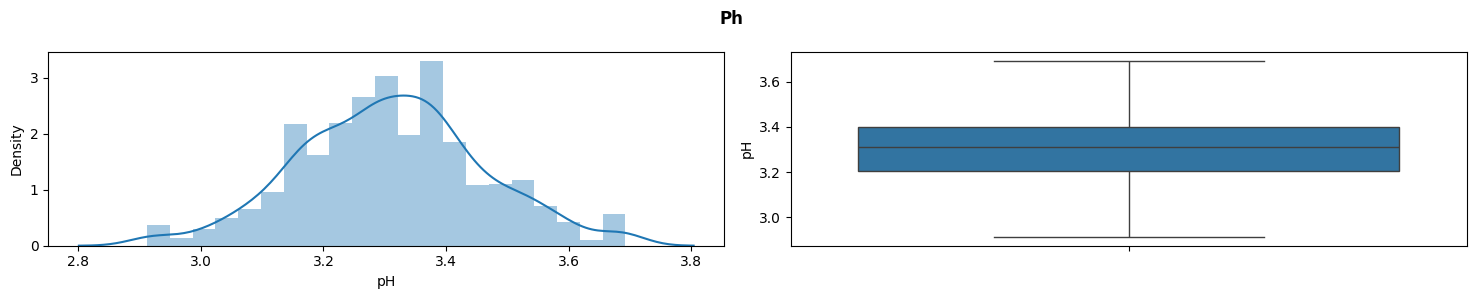

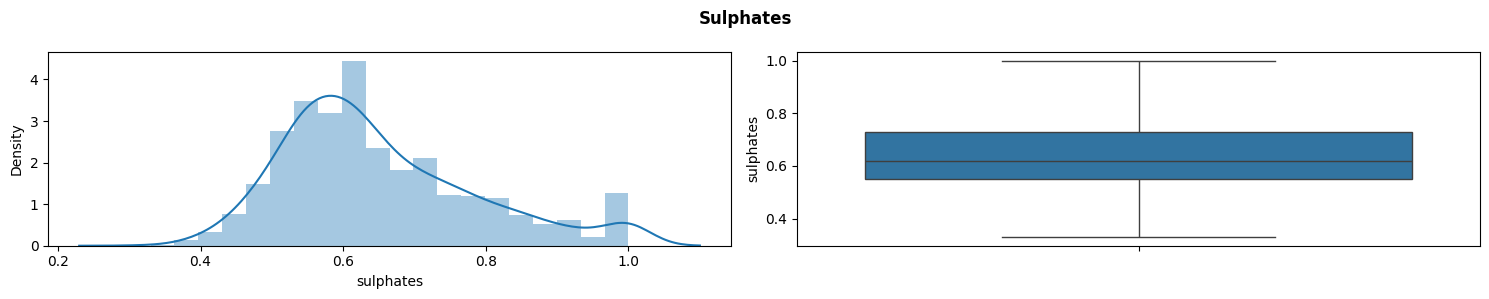

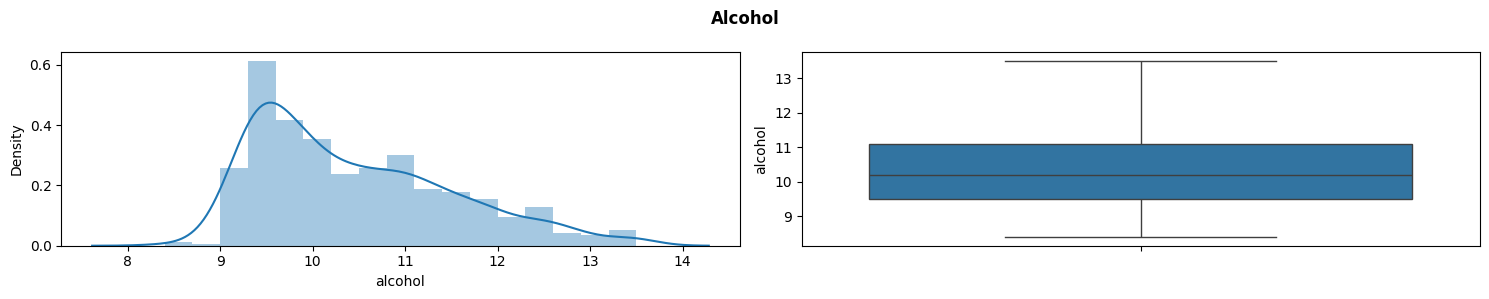

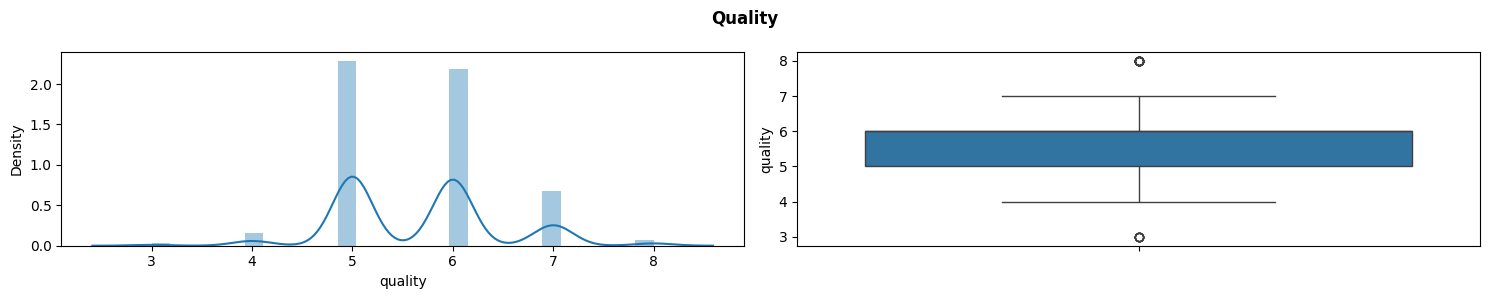

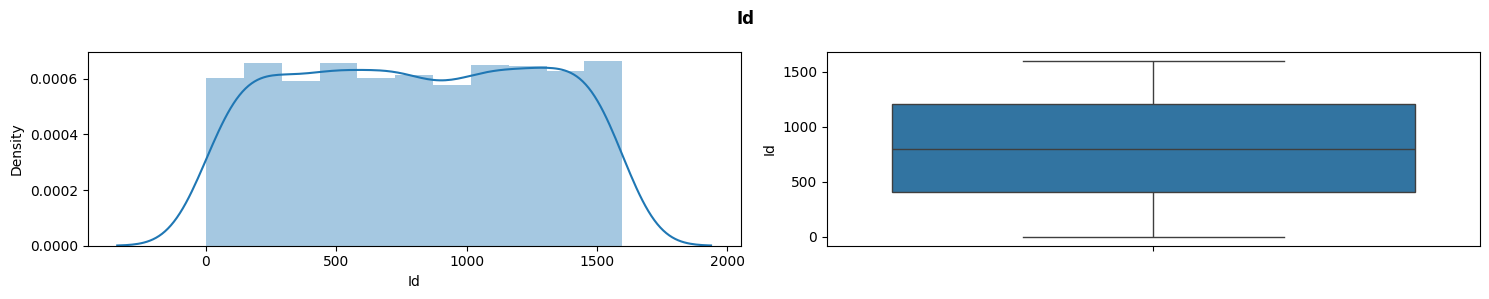

In [29]:
# checking for distribution after treating outliers.
for col in df.columns.to_list():
    fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(15,3))
    sns.distplot(df[col], ax = ax[0])
    sns.boxplot(df[col], ax = ax[1])
    plt.suptitle(f'{col.title()}',weight='bold')
    plt.tight_layout()

## ***Feature Engineering & Data Pre-processing***

In [30]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [31]:
dependent_var = df.quality

In [32]:
df.quality.value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
# Creating an instance for SMOTE
oversample = SMOTE(random_state=42)

In [35]:
X = df.drop(columns='quality')
y = df['quality']

In [36]:
# The rows and columns of X and y
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns before oversampling')
print(f'y has {y.shape[0]} rows before oversampling')

X has 1143 rows and 12 columns before oversampling
y has 1143 rows before oversampling


In [37]:
X, y = oversample.fit_resample(X,y)

In [38]:
y.value_counts()

quality
5    483
6    483
7    483
4    483
8    483
3    483
Name: count, dtype: int64

In [39]:
# Rows in the dataset after oversampling
print(f'Number of rows after oversampling in X is {len(X)}')
print(f'Number of rows after oversampling in y is {len(y)}')

Number of rows after oversampling in X is 2898
Number of rows after oversampling in y is 2898


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [41]:
# Manipulate Features to minimize feature correlation and create new features
# Detecting the multicollinearity using VIF Values.
# Calculating VIF(Variance Inflation Factor) to see the correlation between independent variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [42]:
cal_vif(df[[i for i in df.describe().columns if i not in ['quality']]])

variables          VIF
0          fixed acidity    88.297016
1       volatile acidity    17.800619
2            citric acid     8.702305
3         residual sugar    18.931468
4              chlorides    28.779162
5    free sulfur dioxide     7.491049
6   total sulfur dioxide     7.870626
7                density  1585.429115
8                     pH  1100.974086
9              sulphates    28.992761
10               alcohol   141.681435
11                    Id     5.017496

As we can see above some features are having high correlation but this features are very important for predicting Quality. Hence we cannot remove these features.

### Data Splitting

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2318, 12)
(580, 12)
(2318,)
(580,)


###  Data Scaling

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
X_train = scaler.fit_transform(X_train)

In [50]:
X_test = scaler.transform(X_test)

## ***7. ML Model Implementation***

In [51]:
def predict(ml_model, model_name):

    '''
    Pass the model and predict value.
    Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
    Plotting confusion_matrix and roc_curve for test data.
    '''

    # model fitting
    model = ml_model.fit(X_train, y_train)

    # predicting value and probability
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_test_prob = model.predict_proba(X_test)[:,1]


    ''' Performance Metrics '''
    # accuracy score  ---->  (TP+TN)/(TP+FP+TN+FN)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f'train accuracy : {round(train_accuracy,3)}')
    print(f'test accuracy : {round(test_accuracy,3)}')

    # precision score  ---->  TP/(TP+FP)
    train_precision = precision_score(y_train, y_train_pred, average='micro')
    test_precision = precision_score(y_test, y_test_pred, average='micro')
    print(f'train precision : {round(train_precision,3)}')
    print(f'test precision : {round(test_precision,3)}')

    # recall score  ---->  TP/(TP+FN)
    train_recall = recall_score(y_train, y_train_pred, average='micro')
    test_recall = recall_score(y_test, y_test_pred, average='micro')
    print(f'train recall : {round(train_recall,3)}')
    print(f'test recall : {round(test_recall,3)}')

    # f1 score  ---->  Harmonic Mean of Precision and Recall
    train_f1 = f1_score(y_train, y_train_pred, average='micro')
    test_f1 = f1_score(y_test, y_test_pred, average='micro')
    print(f'train f1 : {round(train_f1,3)}')
    print(f'test f1 : {round(test_f1,3)}')



    # classification report
    print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
    print('-'*80)


    ''' plotting Confusion Matrix '''
    #ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
    #plt.title('confusion matrix on Test data', weight='bold')
    #plt.show()
    #print('-'*80)
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'], cmap="Greens", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'], cmap="Greens", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    model_score = [model_name,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1]
    return model_score

In [52]:
score = pd.DataFrame(index =['model_name','train_accuracy','test_accuracy','train_precision','test_precision','train_recall','test_recall','train_f1','test_f1',],)

### ML Model - 1

train accuracy : 0.618
test accuracy : 0.619
train precision : 0.618
test precision : 0.619
train recall : 0.618
test recall : 0.619
train f1 : 0.618
test f1 : 0.619
classification report for test data 
              precision    recall  f1-score   support

           3       0.81      1.00      0.89        93
           4       0.58      0.51      0.54        94
           5       0.58      0.55      0.57        94
           6       0.42      0.29      0.35       106
           7       0.53      0.56      0.54        99
           8       0.68      0.85      0.76        94

    accuracy                           0.62       580
   macro avg       0.60      0.63      0.61       580
weighted avg       0.60      0.62      0.60       580

--------------------------------------------------------------------------------

Confusion Matrix:


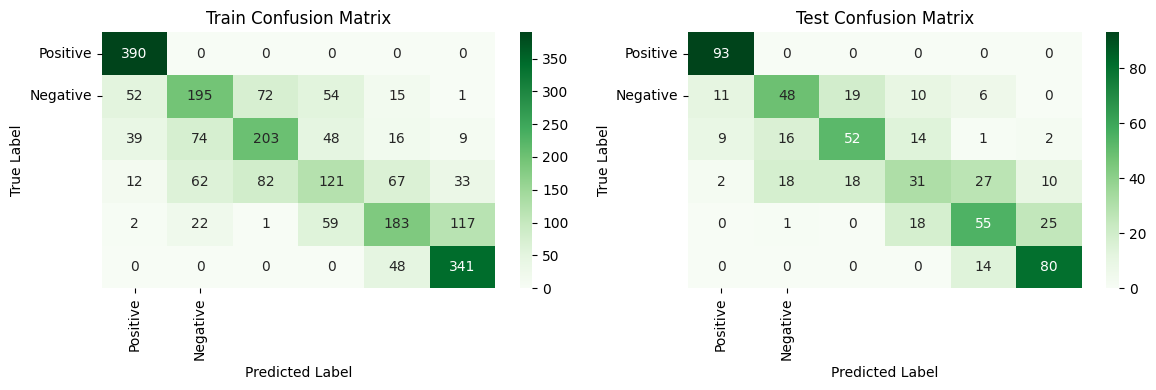

In [53]:
# ML Model - 1 Implementation
lr = predict(LogisticRegression(), 'LogisticRegression')
# model is trained (fit ) and predicted in the evaluate model

In [54]:
score['Logistic regression'] = lr
score

Logistic regression
model_name       LogisticRegression
train_accuracy             0.618205
test_accuracy              0.618966
train_precision            0.618205
test_precision             0.618966
train_recall               0.618205
test_recall                0.618966
train_f1                   0.618205
test_f1                    0.618966

### ML Model - 2

train accuracy : 0.829
test accuracy : 0.805
train precision : 0.829
test precision : 0.805
train recall : 0.829
test recall : 0.805
train f1 : 0.829
test f1 : 0.805
classification report for test data 
              precision    recall  f1-score   support

           3       0.97      1.00      0.98        93
           4       0.78      0.95      0.86        94
           5       0.71      0.61      0.66        94
           6       0.65      0.53      0.58       106
           7       0.77      0.79      0.78        99
           8       0.91      1.00      0.95        94

    accuracy                           0.81       580
   macro avg       0.80      0.81      0.80       580
weighted avg       0.80      0.81      0.80       580

--------------------------------------------------------------------------------

Confusion Matrix:


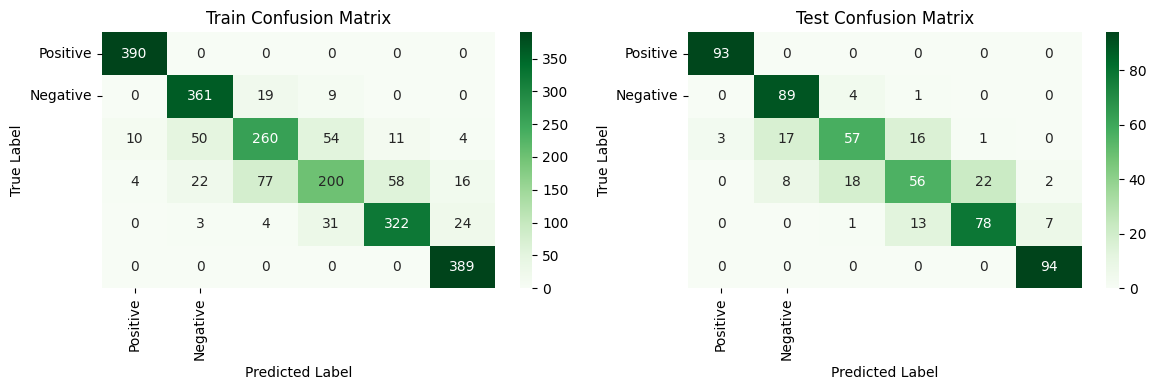

In [55]:
svc = predict(SVC(probability=True), 'SVM')

In [56]:
score['SVM'] = svc
score

Logistic regression       SVM
model_name       LogisticRegression       SVM
train_accuracy             0.618205  0.829163
test_accuracy              0.618966  0.805172
train_precision            0.618205  0.829163
test_precision             0.618966  0.805172
train_recall               0.618205  0.829163
test_recall                0.618966  0.805172
train_f1                   0.618205  0.829163
test_f1                    0.618966  0.805172

#### Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 5  Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
svc = SVC(probability=True)
# set up the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']}
# perform a grid search with 5-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# train the classifier with the best hyperparameters on the full training set
svc_best = SVC(**best_params, probability=True)
svc_best.fit(X_train, y_train)
# Predict on the model
y_test_svc_pred_gs = svc_best.predict(X_test)
y_train_svc_pred_gs = svc_best.predict(X_train)
y_score_svc_pred_gs = svc_best.predict_proba(X_test)[:, 1]

Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


train accuracy : 0.932
test accuracy : 0.86
train precision : 0.932
test precision : 0.86
train recall : 0.932
test recall : 0.86
train f1 : 0.932
test f1 : 0.86
classification report for test data 
              precision    recall  f1-score   support

           3       0.98      1.00      0.99        93
           4       0.88      1.00      0.94        94
           5       0.75      0.61      0.67        94
           6       0.69      0.66      0.68       106
           7       0.88      0.92      0.90        99
           8       0.96      1.00      0.98        94

    accuracy                           0.86       580
   macro avg       0.86      0.86      0.86       580
weighted avg       0.85      0.86      0.85       580

--------------------------------------------------------------------------------

Confusion Matrix:


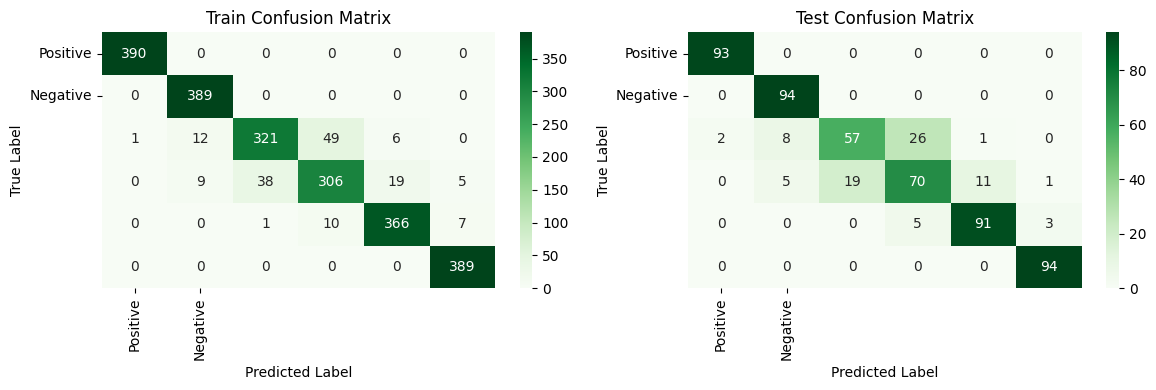

In [58]:
svc_tuned = predict(SVC(probability=True,C=10, gamma='scale',kernel='rbf'), 'SVM_Tuned')

In [59]:
score['SVM Tuned'] = svc_tuned
score

Logistic regression       SVM  SVM Tuned
model_name       LogisticRegression       SVM  SVM_Tuned
train_accuracy             0.618205  0.829163   0.932269
test_accuracy              0.618966  0.805172   0.860345
train_precision            0.618205  0.829163   0.932269
test_precision             0.618966  0.805172   0.860345
train_recall               0.618205  0.829163   0.932269
test_recall                0.618966  0.805172   0.860345
train_f1                   0.618205  0.829163   0.932269
test_f1                    0.618966  0.805172   0.860345

### ML Model - 3

train accuracy : 1.0
test accuracy : 0.869
train precision : 1.0
test precision : 0.869
train recall : 1.0
test recall : 0.869
train f1 : 1.0
test f1 : 0.869
classification report for test data 
              precision    recall  f1-score   support

           3       0.98      1.00      0.99        93
           4       0.88      0.97      0.92        94
           5       0.76      0.79      0.77        94
           6       0.83      0.55      0.66       106
           7       0.82      0.95      0.88        99
           8       0.94      1.00      0.97        94

    accuracy                           0.87       580
   macro avg       0.87      0.88      0.87       580
weighted avg       0.87      0.87      0.86       580

--------------------------------------------------------------------------------

Confusion Matrix:


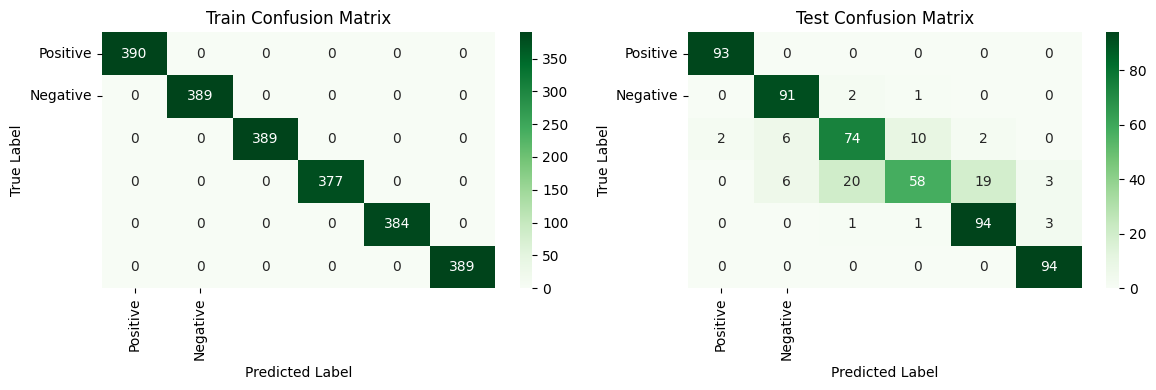

In [60]:
rf = predict(RandomForestClassifier(n_estimators=100, random_state=0), 'RandomForest')

In [61]:
score['Random Forest'] = rf
score

Logistic regression       SVM  SVM Tuned Random Forest
model_name       LogisticRegression       SVM  SVM_Tuned  RandomForest
train_accuracy             0.618205  0.829163   0.932269           1.0
test_accuracy              0.618966  0.805172   0.860345      0.868966
train_precision            0.618205  0.829163   0.932269           1.0
test_precision             0.618966  0.805172   0.860345      0.868966
train_recall               0.618205  0.829163   0.932269           1.0
test_recall                0.618966  0.805172   0.860345      0.868966
train_f1                   0.618205  0.829163   0.932269           1.0
test_f1                    0.618966  0.805172   0.860345      0.868966

#### Cross- Validation & Hyperparameter Tuning

In [62]:
rf_params = {'n_estimators': [500,600,800],     # number of trees in the ensemble
             'max_features': ["log2", "sqrt"],  # maximum number of features considered when splitting a node.
             'max_depth': [35,40,45,50],        # maximum number of levels allowed in each tree.
             'min_samples_split': [7,9,12],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [4,7,10]}      # minimum number of samples which can be stored in a tree leaf.




# performing Hyperparameter Tunning using RandomizedSearchCV
rf = RandomForestClassifier()
rf_randomsearch = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=15, cv=5, verbose=2, n_jobs=-1)

# model fitting
rf_randomsearch.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [35, 40, 45, 50],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [4, 7, 10],
                                        'min_samples_split': [7, 9, 12],
                                        'n_estimators': [500, 600, 800]},
                   verbose=2)

In [63]:
optimal_model = rf_randomsearch.best_estimator_
optimal_model

RandomForestClassifier(max_depth=45, max_features='log2', min_samples_leaf=4,
                       min_samples_split=7, n_estimators=800)

train accuracy : 0.972
test accuracy : 0.855
train precision : 0.972
test precision : 0.855
train recall : 0.972
test recall : 0.855
train f1 : 0.972
test f1 : 0.855
classification report for test data 
              precision    recall  f1-score   support

           3       0.98      1.00      0.99        93
           4       0.87      0.97      0.91        94
           5       0.76      0.70      0.73        94
           6       0.76      0.56      0.64       106
           7       0.81      0.94      0.87        99
           8       0.94      1.00      0.97        94

    accuracy                           0.86       580
   macro avg       0.85      0.86      0.85       580
weighted avg       0.85      0.86      0.85       580

--------------------------------------------------------------------------------

Confusion Matrix:


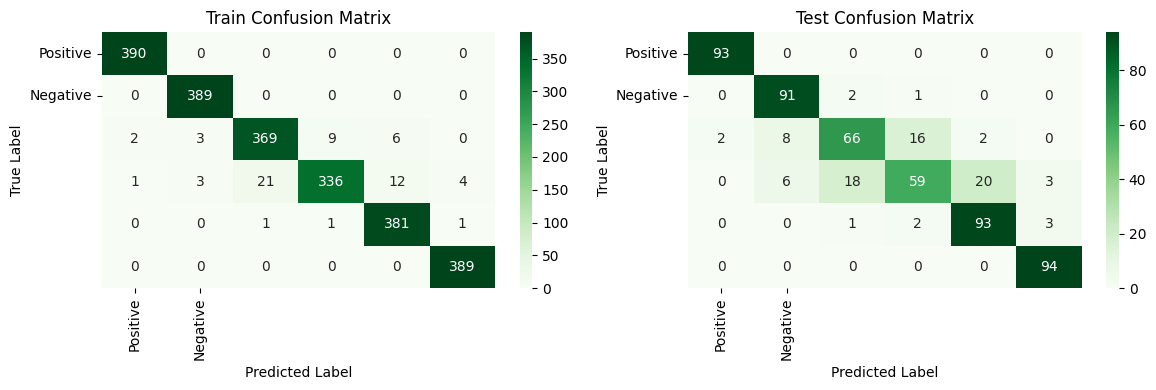

In [64]:
rf_tuned = predict(optimal_model, 'RandomForest_Tuned')

In [65]:
score['Random Forest Tuned'] = rf_tuned
score

Logistic regression       SVM  SVM Tuned Random Forest  \
model_name       LogisticRegression       SVM  SVM_Tuned  RandomForest   
train_accuracy             0.618205  0.829163   0.932269           1.0   
test_accuracy              0.618966  0.805172   0.860345      0.868966   
train_precision            0.618205  0.829163   0.932269           1.0   
test_precision             0.618966  0.805172   0.860345      0.868966   
train_recall               0.618205  0.829163   0.932269           1.0   
test_recall                0.618966  0.805172   0.860345      0.868966   
train_f1                   0.618205  0.829163   0.932269           1.0   
test_f1                    0.618966  0.805172   0.860345      0.868966   

                Random Forest Tuned  
model_name       RandomForest_Tuned  
train_accuracy              0.97239  
test_accuracy              0.855172  
train_precision             0.97239  
test_precision             0.855172  
train_recall                0.97239  
test_recall                0.855172  
train_f1                    0.97239  
test_f1                    0.855172

### ML Model - 4

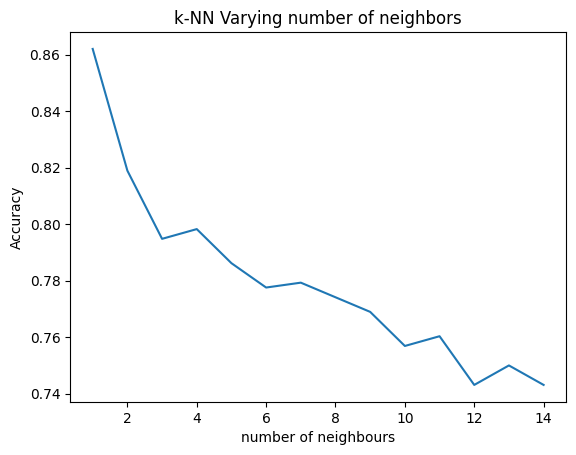

In [66]:
# Checking the optimum value of the k:
accuracy=[]

# Iteratig for the optimum values of k
for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(knn.score(X_test, y_test))

#plotting the k-value vs accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,15), accuracy)
plt.xlabel('number of neighbours')
plt.ylabel('Accuracy')
plt.show()

train accuracy : 1.0
test accuracy : 0.862
train precision : 1.0
test precision : 0.862
train recall : 1.0
test recall : 0.862
train f1 : 1.0
test f1 : 0.862
classification report for test data 
              precision    recall  f1-score   support

           3       0.98      1.00      0.99        93
           4       0.90      1.00      0.94        94
           5       0.72      0.67      0.70        94
           6       0.75      0.59      0.66       106
           7       0.85      0.94      0.89        99
           8       0.95      1.00      0.97        94

    accuracy                           0.86       580
   macro avg       0.86      0.87      0.86       580
weighted avg       0.85      0.86      0.86       580

--------------------------------------------------------------------------------

Confusion Matrix:


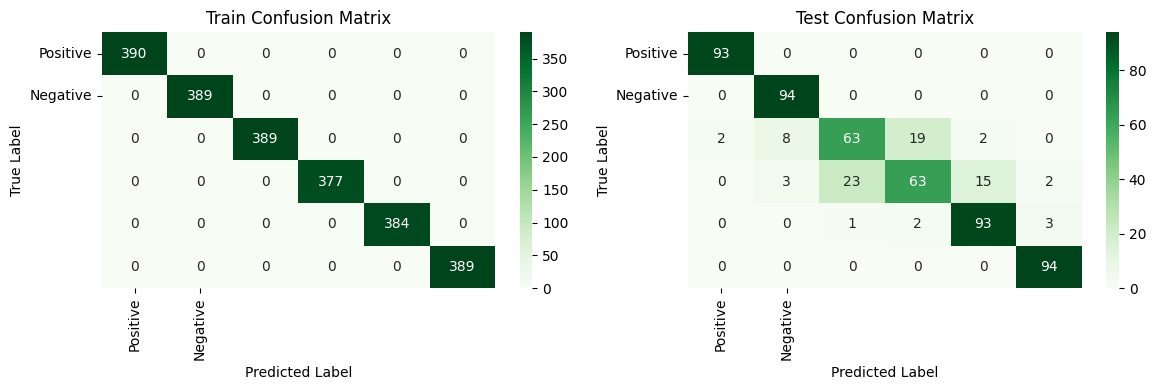

In [67]:
knn = predict(KNeighborsClassifier(n_neighbors=1), 'KNN')

In [68]:
score['KNN'] = knn
score

Logistic regression       SVM  SVM Tuned Random Forest  \
model_name       LogisticRegression       SVM  SVM_Tuned  RandomForest   
train_accuracy             0.618205  0.829163   0.932269           1.0   
test_accuracy              0.618966  0.805172   0.860345      0.868966   
train_precision            0.618205  0.829163   0.932269           1.0   
test_precision             0.618966  0.805172   0.860345      0.868966   
train_recall               0.618205  0.829163   0.932269           1.0   
test_recall                0.618966  0.805172   0.860345      0.868966   
train_f1                   0.618205  0.829163   0.932269           1.0   
test_f1                    0.618966  0.805172   0.860345      0.868966   

                Random Forest Tuned       KNN  
model_name       RandomForest_Tuned       KNN  
train_accuracy              0.97239       1.0  
test_accuracy              0.855172  0.862069  
train_precision             0.97239       1.0  
test_precision             0.855172  0.862069  
train_recall                0.97239       1.0  
test_recall                0.855172  0.862069  
train_f1                    0.97239       1.0  
test_f1                    0.855172  0.862069

#### Cross- Validation & Hyperparameter Tuning

### ML Model - 5

train accuracy : 1.0
test accuracy : 0.793
train precision : 1.0
test precision : 0.793
train recall : 1.0
test recall : 0.793
train f1 : 1.0
test f1 : 0.793
classification report for test data 
              precision    recall  f1-score   support

           3       0.98      0.98      0.98        93
           4       0.78      0.88      0.83        94
           5       0.69      0.59      0.63        94
           6       0.62      0.57      0.59       106
           7       0.76      0.79      0.78        99
           8       0.90      0.99      0.94        94

    accuracy                           0.79       580
   macro avg       0.79      0.80      0.79       580
weighted avg       0.79      0.79      0.79       580

--------------------------------------------------------------------------------

Confusion Matrix:


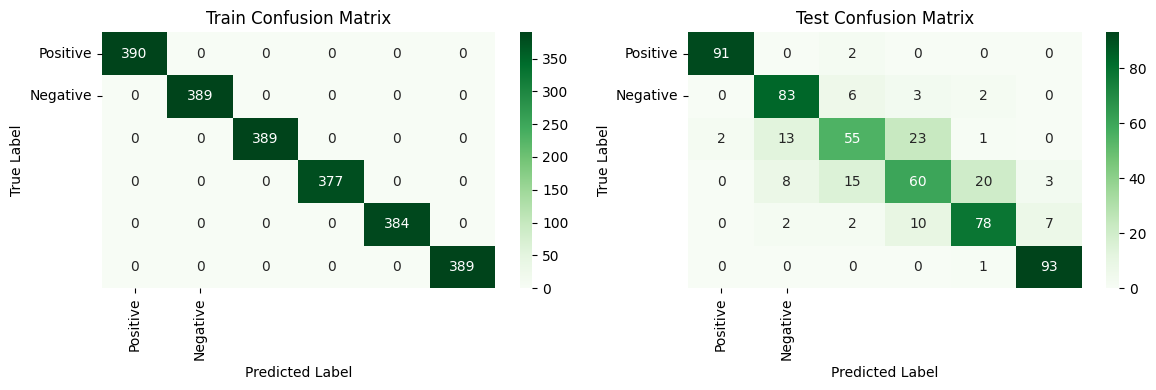

In [69]:
dt = predict(DecisionTreeClassifier(), 'DecisionTree')

In [70]:
score['Decision Tree'] = dt
score

Logistic regression       SVM  SVM Tuned Random Forest  \
model_name       LogisticRegression       SVM  SVM_Tuned  RandomForest   
train_accuracy             0.618205  0.829163   0.932269           1.0   
test_accuracy              0.618966  0.805172   0.860345      0.868966   
train_precision            0.618205  0.829163   0.932269           1.0   
test_precision             0.618966  0.805172   0.860345      0.868966   
train_recall               0.618205  0.829163   0.932269           1.0   
test_recall                0.618966  0.805172   0.860345      0.868966   
train_f1                   0.618205  0.829163   0.932269           1.0   
test_f1                    0.618966  0.805172   0.860345      0.868966   

                Random Forest Tuned       KNN Decision Tree  
model_name       RandomForest_Tuned       KNN  DecisionTree  
train_accuracy              0.97239       1.0           1.0  
test_accuracy              0.855172  0.862069      0.793103  
train_precision             0.97239       1.0           1.0  
test_precision             0.855172  0.862069      0.793103  
train_recall                0.97239       1.0           1.0  
test_recall                0.855172  0.862069      0.793103  
train_f1                    0.97239       1.0           1.0  
test_f1                    0.855172  0.862069      0.793103

#### Cross- Validation & Hyperparameter Tuning

In [71]:
# Define the hyperparameter grid
rf_params  = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, rf_params, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
best_params

{'max_depth': 8,
 'min_samples_leaf': np.int64(10),
 'min_samples_split': np.int64(3)}

train accuracy : 0.77
test accuracy : 0.662
train precision : 0.77
test precision : 0.662
train recall : 0.77
test recall : 0.662
train f1 : 0.77
test f1 : 0.662
classification report for test data 
              precision    recall  f1-score   support

           3       0.79      0.98      0.88        93
           4       0.65      0.73      0.69        94
           5       0.56      0.49      0.52        94
           6       0.41      0.25      0.31       106
           7       0.60      0.69      0.64        99
           8       0.84      0.89      0.87        94

    accuracy                           0.66       580
   macro avg       0.64      0.67      0.65       580
weighted avg       0.64      0.66      0.64       580

--------------------------------------------------------------------------------

Confusion Matrix:


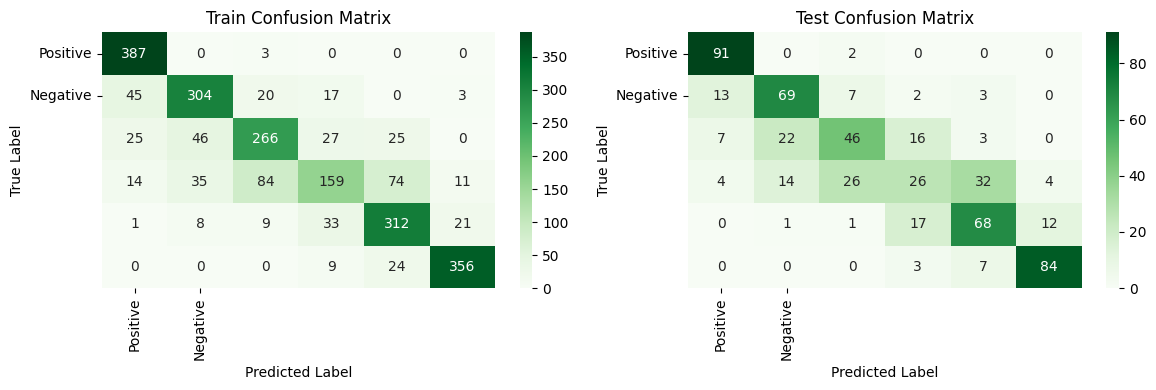

In [72]:
# Train a new model with the best hyperparameters
dt_tuned = predict( DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20), 'DecisionTree_Tuned' )

In [73]:
score['Decision Tree Tuned'] = dt_tuned
score

Logistic regression       SVM  SVM Tuned Random Forest  \
model_name       LogisticRegression       SVM  SVM_Tuned  RandomForest   
train_accuracy             0.618205  0.829163   0.932269           1.0   
test_accuracy              0.618966  0.805172   0.860345      0.868966   
train_precision            0.618205  0.829163   0.932269           1.0   
test_precision             0.618966  0.805172   0.860345      0.868966   
train_recall               0.618205  0.829163   0.932269           1.0   
test_recall                0.618966  0.805172   0.860345      0.868966   
train_f1                   0.618205  0.829163   0.932269           1.0   
test_f1                    0.618966  0.805172   0.860345      0.868966   

                Random Forest Tuned       KNN Decision Tree  \
model_name       RandomForest_Tuned       KNN  DecisionTree   
train_accuracy              0.97239       1.0           1.0   
test_accuracy              0.855172  0.862069      0.793103   
train_precision             0.97239       1.0           1.0   
test_precision             0.855172  0.862069      0.793103   
train_recall                0.97239       1.0           1.0   
test_recall                0.855172  0.862069      0.793103   
train_f1                    0.97239       1.0           1.0   
test_f1                    0.855172  0.862069      0.793103   

                Decision Tree Tuned  
model_name       DecisionTree_Tuned  
train_accuracy             0.769629  
test_accuracy              0.662069  
train_precision            0.769629  
test_precision             0.662069  
train_recall               0.769629  
test_recall                0.662069  
train_f1                   0.769629  
test_f1                    0.662069

In [74]:
score = score.transpose()
score.reset_index(drop=True, inplace=True)

In [75]:
score

model_name train_accuracy test_accuracy train_precision  \
0  LogisticRegression       0.618205      0.618966        0.618205   
1                 SVM       0.829163      0.805172        0.829163   
2           SVM_Tuned       0.932269      0.860345        0.932269   
3        RandomForest            1.0      0.868966             1.0   
4  RandomForest_Tuned        0.97239      0.855172         0.97239   
5                 KNN            1.0      0.862069             1.0   
6        DecisionTree            1.0      0.793103             1.0   
7  DecisionTree_Tuned       0.769629      0.662069        0.769629   

  test_precision train_recall test_recall  train_f1   test_f1  
0       0.618966     0.618205    0.618966  0.618205  0.618966  
1       0.805172     0.829163    0.805172  0.829163  0.805172  
2       0.860345     0.932269    0.860345  0.932269  0.860345  
3       0.868966          1.0    0.868966       1.0  0.868966  
4       0.855172      0.97239    0.855172   0.97239  0.855172  
5       0.862069          1.0    0.862069       1.0  0.862069  
6       0.793103          1.0    0.793103       1.0  0.793103  
7       0.662069     0.769629    0.662069  0.769629  0.662069

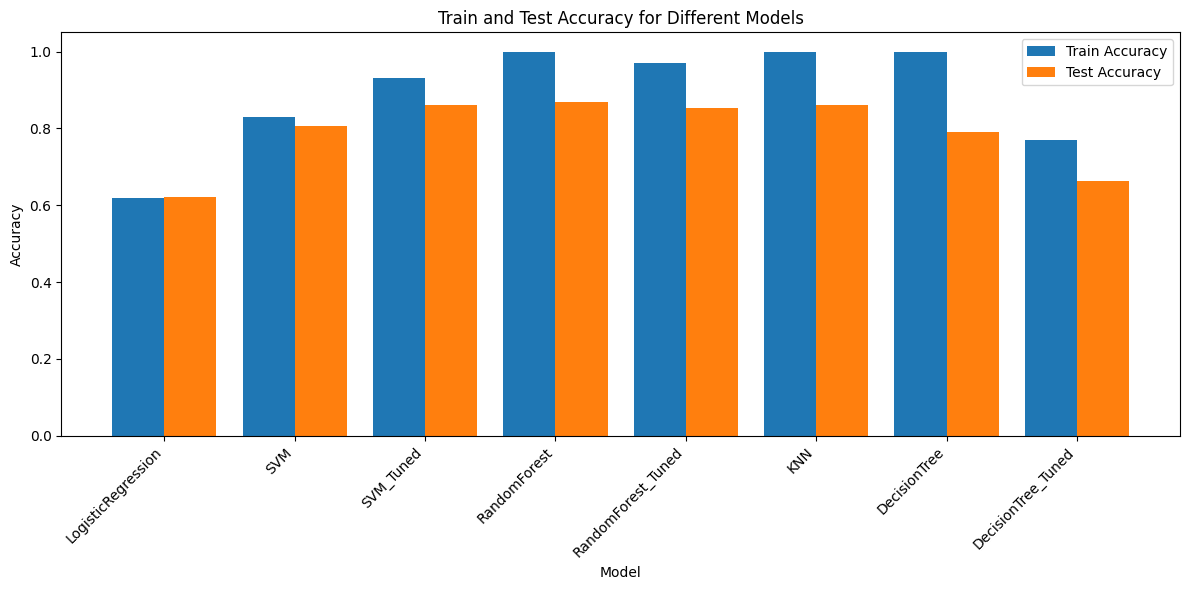

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names
model_names = ['LogisticRegression', 'SVM', 'SVM_Tuned', 'RandomForest', 'RandomForest_Tuned', 'KNN', 'DecisionTree', 'DecisionTree_Tuned']

# Define the train and test accuracy values
train_accuracy = [0.618637, 0.829163, 0.932269, 1.0, 0.971096, 1.0, 1.0, 0.769629]
test_accuracy = [0.62069, 0.805172, 0.860345, 0.868966, 0.853448, 0.862069, 0.789655, 0.662069]

# Define the x-axis positions for the bars
x = np.arange(len(model_names))

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the train accuracy bars
ax.bar(x - 0.2, train_accuracy, width=0.4, label='Train Accuracy')

# Plot the test accuracy bars
ax.bar(x + 0.2, test_accuracy, width=0.4, label='Test Accuracy')

# Set the x-axis tick labels
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Train and Test Accuracy for Different Models')

# Add a legend
ax.legend()

# Adjust the layout to prevent overlapping of x-tick labels
plt.tight_layout()

# Display the plot
plt.show()

# **Conclusion**

To determine which model is performing well and is more generalized, we have analyzed all models metrics accordingly that their may be signs of overfitting or underfitting.

Models that may be overfitting:

* RandomForest: Achieved perfect accuracy (1.0) on the training data but lower accuracy on the test data (0.868966), indicating overfitting.

* KNN: Also achieved perfect accuracy (1.0) on the training data but lower accuracy on the test data (0.862069), suggesting overfitting.

* DecisionTree: Perfect accuracy (1.0) on the training data but lower accuracy on the test data (0.789655), a clear sign of overfitting.

Models that may be underfitting:

* DecisionTree_Tuned: Low accuracy on both training (0.769629) and test data (0.662069), indicating potential underfitting.

After excluding the models that show signs of overfitting or underfitting, the remaining models are:

* LogisticRegression
* SVM
* SVM_Tuned
* RandomForest_Tuned

Among these models, SVM_Tuned and RandomForest_Tuned stand out as the best-performing models based on their test metrics:

* SVM_Tuned: Test accuracy of 0.860345, and consistent performance across other test metrics (precision, recall, and F1 score).
* RandomForest_Tuned: Test accuracy of 0.853448, slightly lower than SVM_Tuned but still relatively high and consistent across other test metrics.

Between these two models, SVM_Tuned appears to be the more generalized model as it has the highest test accuracy and consistent performance across other test metrics, indicating better generalization to unseen data.

Therefore, based on the provided metrics and after excluding models that show signs of overfitting or underfitting, the SVM_Tuned model can be considered the best-performing and most generalized model for this classification wine quality prediction task.